# 8 Ensemble-Learning

Follow the notebook to understand the background and implementation of ensemble learning through its 2 subtypes using built-in libraries and functions from skLearn followed by a visualization of their associated graphs and analysis of their accuracy.

## Bagging

### Pre-Processing

Before implementing the SVM algorithm, we want to examine the dataframe input and whether any pre-processing needs to occur. Here we are using SkLearn's wine dataframe to see how it contrasts the external one used in past notebooks.

The dataset has dimensions of 178 rows x 13 columns. This is a highly condensed alternative to the external dataset previously used. We add the target (0s or 1s) from sklearn in the 14th column for readability and cohesion.

In order to properly visualize the data, we take only the first 100 data points

In [1]:
#load in the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

#load and examine the raw contents of the dataset

from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
wines = wine.data
wines['target'] = wine.target

#shuffle the inputs so that we aren't just getting one type of wine and take the first 100
wines = wines.sample(frac=1)
wines = wines.iloc[:100]


In [2]:
wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
43,13.24,3.98,2.29,17.5,103.0,2.64,2.63,0.32,1.66,4.36,0.820,3.00,680.0,0
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.850,1.56,695.0,2
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.780,1.29,600.0,2
112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.230,2.50,607.0,1
165,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.780,1.75,520.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.080,2.85,1045.0,0
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.170,2.82,1280.0,0
70,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870.0,1
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.240,3.37,1265.0,0


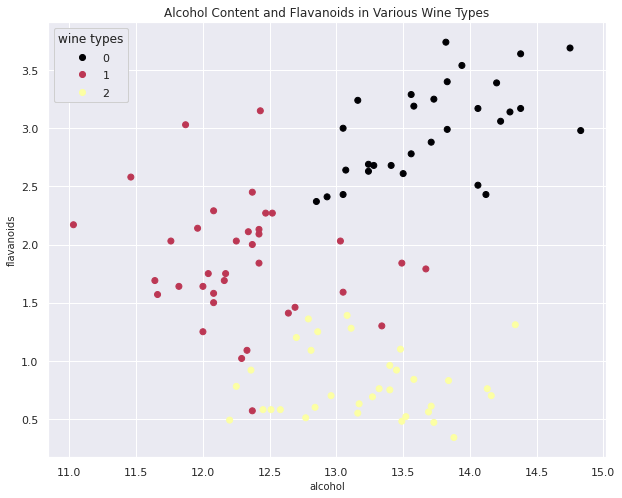

In [3]:
#for training and testing
X = wines[['alcohol', 'flavanoids']]
y = wines.target[:100]

#for graphing
a = wines.alcohol
b = wines.flavanoids

#plot the shuffled inputs
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(a, b, c=y, cmap='inferno')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="wine types")
ax.add_artist(legend1)
ax.set_xlabel(a.name, fontsize = 10)
ax.set_ylabel(b.name, fontsize = 10)
ax.set_title('Alcohol Content and Flavanoids in Various Wine Types')
ax.grid(True)

plt.show()

### Implementation to Train and Test

Use skLearn's train, test, split function to section the input data with training using 70% of the data and testing using 30% of the data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(np.array(X), 
                                                    y,
                                                    test_size = 0.3, 
                                                    random_state = 42)
#apply the classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)

### Accuracy

Here we want to test the classification and accuracy of the Bagging model.

The decision region plot seems to accurately section off the regions where points belong

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


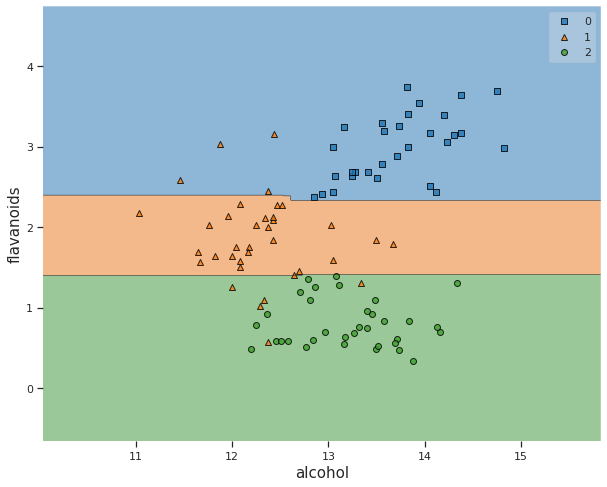

In [5]:
from mlxtend.plotting import plot_decision_regions

#change the inputs to arrays for plotting
X_arr = np.array(X)
y_arr = np.array(y)
plt.figure(figsize = (10, 8))
plot_decision_regions(X_arr, y_arr, clf = bag_clf)
plt.xlabel(a.name, fontsize = 15)
plt.ylabel(b.name, fontsize = 15)
plt.grid()
plt.show()

We want to get the classification report of the Bagging model, which shows above average results, but could certainly be improved since there seems to be some variability

In [6]:
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.64      0.78        11
           2       0.82      1.00      0.90         9

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.86        30
weighted avg       0.89      0.87      0.86        30
 



## Random Forests

### Implementation to Train and Test

Use skLearn's train, test, split function to section the input data with training using 70% of the data and testing using 30% of the data

In [7]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3, 
                                                    random_state = 42)
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


### Accuracy

Here we want to test the classification and accuracy of the Random Forests model.

The decision region plot seems to accurately section off the regions where points belong

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


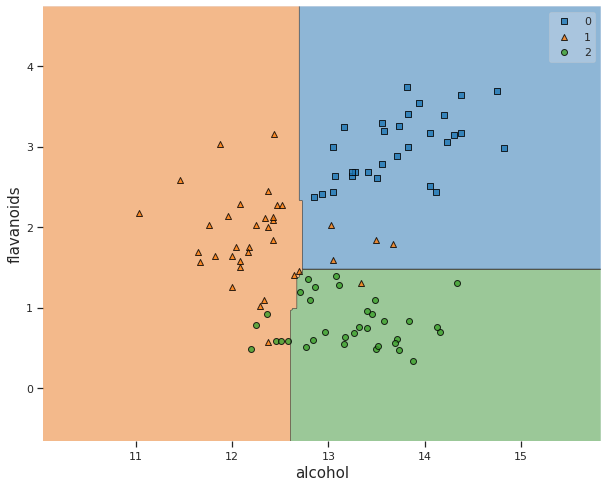

In [8]:
#change the inputs to arrays for plotting
X_arr = np.array(X)
y_arr = np.array(y)

plt.figure(figsize = (10, 8))
plot_decision_regions(X_arr, y_arr, clf = forest_clf)
plt.xlabel(a.name, fontsize = 15)
plt.ylabel(b.name, fontsize = 15)
plt.grid()
plt.show()


We want to get the classification report of the Random Forests model, which shows better results than the Bagging method

In [9]:
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.64      0.78        11
           2       0.82      1.00      0.90         9

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.86        30
weighted avg       0.89      0.87      0.86        30
 

